# Factores de riesgo
Este proyecto se corresponde al trabajo final del curso de Data Science dictado por la Fundación YPF en el año 2024.

## Objetivos del proyecto
Desarrollar un modelo predictivo para identificar individuos con alto riesgo de desarrollar enfermedades crónicas (como hipertensión, diabetes, colesterol alto) basándose en sus comportamientos y condiciones de vida.

## Setup de archivos

### Imports

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from utils.funcions import (
    calcular_nulos_y_porcentaje
)
from utils.codificaciones import *


### Lectura de datasets

In [ ]:
# Conecto drive
from google.colab import drive
drive.mount('/content/drive')

# Leo el archivo
friesgo_2018 = pd.read_csv('/content/drive/MyDrive/INGENIAS/TrabajoP/bd/friesgo2018.txt', delimiter = '|')

In [6]:
## Leo el archivo localmente
friesgo_2018 = pd.read_csv('datasets/friesgo2018.txt', delimiter = '|')

## Analizando el dataset (raw)

In [56]:
# Determino filas y columnas
friesgo_2018.shape

(29224, 287)

In [ ]:
# Obtengo las 5 primeras filas del dataset
friesgo_2018.head()

,id,cod_provincia,region,tamanio_aglomerado,aglomerado,localidades_150,submuestra,bhcv01,bhcv02,bhcv03,...,glucemia_elevada,prevalencia_glucemia_elevada_combinada,findrisc,bimq06,bimq06_01,colesterol_elevado,prevalencia_colesterol_combinada,wf1p,wf2p,wf3p
0,1128639,2,1,1,1,1,1,3,2,1,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2378,4464,0
1,1709939,2,1,1,1,1,0,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3588,0,0
2,6874130,2,1,1,1,1,0,3,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2740,0,0
3,10319375,2,1,1,1,1,1,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493,0,0
4,11140857,2,1,1,1,1,0,3,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,0,0


##  Evaluacion de columnas del dataset

Vamos a agrupar las columnas por temática, manteniendo ciertas columnas que permiten la identificacion del registro (como el id) y aquellas necesarias para realizar analisis, tales como variables demograficas.
Por cada temática:

*   Visualizo las primeras filas
*   Renombro columnas y evaluo los nulos
*   Calculo de porcentaje de faltantes por columna

### Busqueda y localizacion de bloques tematicos

In [7]:
#Busco el indice de una columna para dividir los bloques tematicos
friesgo_2018.columns.get_loc('cobertura_salud')

65

In [8]:
hipertension = friesgo_2018.iloc[:,140:159]
#hipertension.head(20)
calcular_nulos_y_porcentaje(hipertension)

,Nulos,Porcentaje
biha01,0,0.000000
biha02,2082,7.124281
biha03,0,0.000000
biha04,18791,64.299891
biha05_01,23511,80.450999
biha05_02,23511,80.450999
biha06,24009,82.155078
biha06_99,29201,99.921298
biha07,23986,82.076376
biha08,23986,82.076376


In [9]:
pesocorporal = friesgo_2018.iloc[:,160:168]
#pesocorporal.head(20)
calcular_nulos_y_porcentaje(pesocorporal)

,Nulos,Porcentaje
bipc01,0,0.000000
bipc02,19984,68.382152
bipc03,5401,18.481385
bipc04,1011,3.459485
bipc04_99,28213,96.540515
bipc05,1676,5.735012
bipc05_99,27548,94.264988
imc,2229,7.627293


In [10]:
alimentacion = friesgo_2018.iloc[:,169:186]
#alimentacion.head(20)
calcular_nulos_y_porcentaje(alimentacion)

,Nulos,Porcentaje
bial01,0,0.000000
bial02,0,0.000000
bial03,571,1.953874
bial03_99,28653,98.046126
bial04,3018,10.327128
bial04_99,28774,98.460170
bial05,287,0.982070
bial05_99,28937,99.017930
bial06,1164,3.983028
bial06_99,28965,99.113742


In [11]:
diabetes = friesgo_2018.iloc[:,218:236]
#diabetes.head(20)
calcular_nulos_y_porcentaje(diabetes)

,Nulos,Porcentaje
bidi01,0,0.000000
bidi02,26829,91.804681
bidi03,25300,86.572680
bidi04_01,27058,92.588284
bidi04_02,27058,92.588284
bidi04_03,27058,92.588284
bidi05,27058,92.588284
bidi06_01,0,0.000000
bidi06_02,0,0.000000
bidi07,0,0.000000


In [12]:
mediciones_antropometricas = friesgo_2018.iloc[:,252:273]
#mediciones_antropometricas.head(20)
calcular_nulos_y_porcentaje(mediciones_antropometricas)

,Nulos,Porcentaje
bima01,7505,25.680947
bima02,12647,43.276074
bima03,12830,43.902272
bima04_01_a,12997,44.473720
bima04_01_b,12997,44.473720
bima04_02_a,12997,44.473720
bima04_02_b,12997,44.473720
bima04_03_a,12997,44.473720
bima04_03_b,12997,44.473720
promedio_sistolica,12997,44.473720


In [13]:
mediciones_bioquimicas = friesgo_2018.iloc[:,274:283]
#mediciones_bioquimicas.head(20)
calcular_nulos_y_porcentaje(mediciones_bioquimicas)

,Nulos,Porcentaje
bimq01,19978,68.361621
bimq05,24036,82.247468
bimq05_01,29081,99.510676
glucemia_elevada,24036,82.247468
prevalencia_glucemia_elevada_combinada,24060,82.329592
findrisc,16128,55.187517
bimq06,24313,83.195319
bimq06_01,28804,98.562825
colesterol_elevado,24313,83.195319


### Tabaquismo
Agregar detalle de columnas implicadas en este dataset.

#### Remuevo las siguientes columnas por ser calculadas en base a las respuestas de otras preguntas

* consumo_tabaco_100
* ta_paquete_y_armado
* ta_dejar_fumar
* ta_otros_productos
* hta_nofumadores
* ta_perc_publicidad
* ta_percepcion_riesgo

In [14]:
# Creo el DataFrame para tabaquismo
# Selecciono la columna 0 - correspondiente a la columna id - y el rango de preguntas para tabaquismo
tabaquismo = friesgo_2018.iloc[:, [0] + list(range(98, 132))]

In [15]:
# Visualizo las primeras 20 filas
tabaquismo.head(20)

,id,bita01,bita02,bita02_99,bita03,bita04,bita04_01,bita04_02,bita05,bita06_a,...,bita10_03,bita10_04,bita10_05,bita10_06,bita11,bita12,bita13,bita14,bita15,bita16
0,1128639,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,98,2,1,2,2,1,NaN,2
1,1709939,1,20.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,...,2,2,2,2,1,2,2,2,NaN,1
2,6874130,1,18.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,...,98,2,2,1,1,2,2,1,NaN,2
3,10319375,1,14.0,NaN,1.0,1.0,2.0,1.0,1.0,1.0,...,2,2,1,2,2,2,2,1,2.0,1
4,11140857,1,13.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,...,2,2,2,2,1,2,2,1,NaN,99
5,12665714,1,14.0,NaN,1.0,2.0,2.0,1.0,2.0,1.0,...,2,2,2,1,1,2,2,1,2.0,2
6,13089112,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,1,2,2,2,1,NaN,99
7,19254804,1,16.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,...,2,2,2,2,1,2,2,2,NaN,1
8,19959160,1,16.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,1,NaN,1
9,21544403,1,18.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,...,98,2,2,2,98,2,2,2,NaN,1


In [16]:
# Renombro columnas
tabaquismo.rename(columns = {
    'bita01':       'es_fumador',
    'bita02':       'edad_fuma_primera_vez',
    'bita02_99':    'edad_fuma_primera_vez_ns_nc',
    'bita03':       'fumado_100_cigarrillos',
    'bita04':       'periodicidad_fumador',
    'bita04_01':    'es_cigarrillo_armado',
    'bita04_02':    'es_cigarrillo_paquete',
    'bita05':       'marca_cigarrillos',
    'bita06_a':     'tipo_paquete_comprado',
    'bita06_b':     'cant_cigarrillos_comprados',
    'bita06_b_99':  'cant_cigarrillos_comprados_ns_nc',
    'bita06_c':     'cigarrillos_sabor',
    'bita06_d':     'cigarrillos_tipo_capsula',
    'bita07':       'dinero_pagado_ultima_compra_cigarrillos',
    'bita07_99':    'dinero_pagado_ultima_compra_cigarrillos_ns_nc',
    'bita08':       'intento_dejar_fumar',
    'bita09_01':    'es_fumador_cigarro_habano',
    'bita09_02':    'es_fumador_cigarritos',
    'bita09_03':    'es_fumador_pipa_comun',
    'bita09_04':    'es_fumador_pipa_agua',
    'bita09_05':    'es_fumador_tabaco_masticar',
    'bita09_06':    'es_fumador_cigarrillo_electronico',
    'bita10_01':    'hubo_fumadores_casa',
    'bita10_02':    'hubo_fumadores_trabajo',
    'bita10_03':    'hubo_fumadores_escuela',
    'bita10_04':    'hubo_fumadores_restaurant',
    'bita10_05':    'hubo_fumadores_hospital',
    'bita10_06':    'hubo_fumadores_otros_lugares',
    'bita11':       'publicidad_comercios',
    'bita12':       'publicidad_email',
    'bita13':       'suscripcion_cigarrera',
    'bita14':       'vio_propaganda_riesgo_fumar',
    'bita15':       'propaganda_piensa_dejar_fumar',
    'bita16':       'acuerdo_impuesto_tabaco'
}, inplace = True)

C:\Users\Biank\AppData\Local\Temp\ipykernel_9784\2009123552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabaquismo.rename(columns = {


In [17]:
# Visualizo nulos y porcentaje
calcular_nulos_y_porcentaje(tabaquismo)

,Nulos,Porcentaje
id,0,0.000000
es_fumador,0,0.000000
edad_fuma_primera_vez,14170,48.487544
edad_fuma_primera_vez_ns_nc,29096,99.562004
fumado_100_cigarrillos,14042,48.049548
periodicidad_fumador,14042,48.049548
es_cigarrillo_armado,22618,77.395292
es_cigarrillo_paquete,22618,77.395292
marca_cigarrillos,22769,77.911990
tipo_paquete_comprado,25023,85.624829


### Ubicacion

Esta seccion contiene las siguientes columnas:
+ id
+ cod_provincia
+ region
+ tamanio_aglomerado
+ aglomerado : Aglomerado urbano de 500.000 y más habitantes
+ localidades_150 : Tamaño de localidad - 150.000 habitantes o más. (1 True 0 False)
+ submuestra : Identificación de la submuestra de los pasos 2 y 3 (*). Correspondientes a las mediciones antropometricas y bioquimicas. (De no usar las mediciones recomiendo borrar esta columna). (1 True 0 False)
(*) Ver readme

In [18]:
# Creo una tabla aparte para ubicacion
ubicacion = friesgo_2018.iloc[:,0:7]
#ubicacion.head()

### Consumo alcohol

Este bloque tematico esta compuesto por las siguientes columnas:
+ id 
+ ha_consumido_alc COD
+ fecha_ult_cons COD
+ freq_30_ds (Int 1:7)
+ freq_30_dm (Int 0:30)
+ freq_30_nsnc (solo 99)
+ tragos_cerveza 
+ tragos_cerveza_notoma *
+ tragos_vino
+ tragos_vino_notoma *
+ tragos_bebida_fuerte
+ tragos_bebida_fuerte_notoma *
+ toma_otras_bebidas **
+ sobrecon_cant_cerveza 
+ sobrecon_cerv_notoma *
+ sobrecon_cant_vino
+ sobrecon_vino_notoma *
+ sobrecon_cant_bebfuerte 
+ sobrecon_bebfuerte_notoma *
+ sobrecon_otrasb **
+ manejo_alcholizado30,
+ aprueba_aumento_imp_alchol
+ consumo_regular_riesgo **
+ consumo_episodico_excesivo **
(*) Solo un valor 98:'No toma'
(**) 1:'Si' , 2: 'No'

In [19]:
# Creo mi tabla de consumo de alcohol
consumo_alcohol = friesgo_2018.iloc[:, [0] + list(range(195,217))]
consumo_alcohol.head()

,id,bica01,bica02,bica03_01,bica03_02,bica03_99,bica04_01_b,bica04_01_c,bica04_02_b,bica04_02_c,...,bica05_01_b,bica05_01_c,bica05_02_b,bica05_02_c,bica05_03_b,bica05_03_c,bica05_04,bica06,bica07,consumo_regular_riesgo
0,1128639,1,1.0,1.0,NaN,NaN,1.0,NaN,NaN,98.0,...,3.0,NaN,1.0,NaN,NaN,98.0,2.0,2.0,2,2.0
1,1709939,1,1.0,NaN,1.0,NaN,NaN,98.0,1.0,NaN,...,NaN,98.0,NaN,98.0,NaN,98.0,2.0,2.0,2,2.0
2,6874130,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0
3,10319375,1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0
4,11140857,1,1.0,1.0,NaN,NaN,1.5,NaN,NaN,98.0,...,NaN,98.0,NaN,98.0,NaN,98.0,2.0,2.0,99,2.0


In [20]:
consumo_alcohol.columns

Index(['id', 'bica01', 'bica02', 'bica03_01', 'bica03_02', 'bica03_99',
       'bica04_01_b', 'bica04_01_c', 'bica04_02_b', 'bica04_02_c',
       'bica04_03_b', 'bica04_03_c', 'bica04_04', 'bica05_01_b', 'bica05_01_c',
       'bica05_02_b', 'bica05_02_c', 'bica05_03_b', 'bica05_03_c', 'bica05_04',
       'bica06', 'bica07', 'consumo_regular_riesgo'],
      dtype='object')

In [21]:
# Renombro las columnas
consumo_alcohol.rename( columns = {
    'bica01': 'ha_consumido_alc',
    'bica02': 'fecha_ult_cons',
    'bica03_01': 'freq_30_ds',
    'bica03_02': 'freq_30_dm',
    'bica03_99': 'freq_30_nsnc',
    'bica04_01_b': 'tragos_cerveza',
    'bica04_01_c': 'tragos_cerveza_notoma',
    'bica04_02_b': 'tragos_vino',
    'bica04_02_c': 'tragos_vino_notoma',
    'bica04_03_b': 'tragos_bebida_fuerte',
    'bica04_03_c': 'tragos_bebida_fuerte_notoma',
    'bica04_04': 'toma_otras_bebidas',
    'bica05_01_b': 'sobrecon_cant_cerveza',
    'bica05_01_c': 'sobrecon_cerv_notoma',
    'bica05_02_b': 'sobrecon_cant_vino',
    'bica05_02_c': 'sobrecon_vino_notoma',
    'bica05_03_b': 'sobrecon_cant_bebfuerte',
    'bica05_03_c': 'sobrecon_bebfuerte_notoma',
    'bica05_04': 'sobrecon_otrasb',
    'bica06': 'manejo_alcholizado30',
    'bica07': 'aprueba_aumento_imp_alchol'
}, inplace= True)

C:\Users\Biank\AppData\Local\Temp\ipykernel_9784\2100149357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo_alcohol.rename( columns = {


### Colesterol

Esta seccion contiene las siguientes columnas :
+ medido_colesterol **
+ fecha_med_colesterol COD
+ colesterol_alto **
+ tratamiento_medico_col *
+ trat_hab_col *
+ trat_farmac_col *
+ control_colesterol **
+ prevalencia_colesterol **

(*)No voy a hacer un diccionario para los siguientes ya que se repite el patron= 1: No, 2:Si 
(**) Anterior + codigo 99:Ns/Nc
(COD) Tiene codificacion

In [22]:
# Creo mi tabla de tematica: colesterol
colesterol = friesgo_2018.iloc[:, [0] + list(range(187,195))]

In [23]:
# Renombro las columnas 
colesterol.rename( columns={
    'bico01': 'medido_colesterol',
    'bico02': 'fecha_med_colesterol',
    'bico03': 'colesterol_alto',
    'bico04': 'tratamiento_medico_col',
    'bico05_01': 'trat_habitos_col',
    'bico05_02': 'trat_farmac_col',
    'control_colesterol': 'autocontrol_col'
}, inplace= True)

C:\Users\Biank\AppData\Local\Temp\ipykernel_9784\3284842897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colesterol.rename( columns={


In [24]:
#colesterol.columns
#colesterol.head()
#calcular_nulos_y_porcentaje(colesterol)

### Salud general y actividad fisica

Según el diccionario de registros correspondiente al dataset, las variables (nombres de columnas) que corresponden a los temas indicados son: 

*SALUD GENERAL*
+ "bisg01", 
+ "bisg02",
+ "bisg03",
+ "bisg04",
+ "bisg05",
+ "bisg06",

*ACTIVIDAD FÍSICA*
+ "biaf01",
+ "biaf02_m",
+ "biaf02_99",
+ "biaf03",
+ "biaf04_m",
+ "biaf04_99",
+ "biaf05",
+ "biaf06_m",
+ "biaf06_99",
+ "biaf07_m",
+ "biaf07_99",
+ "biaf08",
+ "biaf09",
+ "biaf10_01",
+ "biaf10_02",
+ "biaf10_03",
+ "biaf10_04",
+ "nivel_actividad_fisica",
+ "barreras_actividad_fisica"

In [25]:
#Formando el subset salud_y_af y renombrando sus variables
salud_y_af = friesgo_2018.iloc[:, [0] + list(range(73,98))]
#salud_y_af.head()

In [26]:

# Renombro columnas
salud_y_af.rename(columns = {
    #SALUD GENERAL 
"bisg01" : "salud_actual",
"bisg02" : "nivel_de_movilidad",
"bisg03" : "capacidad_cuidado_personal",
"bisg04" : "capacidad_actividades_cotidianas",
"bisg05" : "dolor_malestar_general",
"bisg06" : "ansiedad_depresion",

#ACTIVIDAD FÍSICA  af
"biaf01" : "af_intensa_veces_por_semana",
"iaf02_m" : "af_intensa_min_totales_por_semana",
"biaf02_99" : "af_intensa_min_totales_por_semana_nsnc",
"biaf03" : "af_moderada_veces_por_semana",
"biaf04_m" : "af_moderada_min_totales_por_semana",
"biaf04_99" : "actividad_fisica_moderada_min_totales_por_semana_nsnc",
"biaf05" : "caminata_veces_por_semana",
"biaf06_m" : "caminata_min_totales_por_semana",
"biaf06_99" : "caminata_min_totales_por_semana_nsnc",
"biaf07_m" : "tiempo_sentado_min_por_dia",
"biaf07_99" : "tiempo_sentado_min_por_dia_nsnc",
"biaf08" : "razon_ninguna_actividad_la_ultima_semana",
"biaf09" : "razon_poca_actividad_la_ultima_semana",
"biaf10_01" : "af_fue_actividad_domestica",
"biaf10_02" : "af_fue_actividad_laboral",
"biaf10_03" : "af_fue_traslado",
"biaf10_04" : "af_fue_deporte",
"nivel_actividad_fisica" : "nivel_af",
"barreras_actividad_fisica" : "barreras_af"

}, inplace = True)

C:\Users\Biank\AppData\Local\Temp\ipykernel_9784\2501277099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salud_y_af.rename(columns = {


In [27]:
#salud_y_af.columns

### Caracteristicas del encuestado

Esta tabla esta compuesta por las siguientes columnas:
+ 'id',
+ 'relacion_jefeh' : eliminada, por no ser relevante
+ 'sexo', COD
+ 'edad', entero(0:104)
+ 'rango_etario' : eliminada ya que deriva de edad
+ 'situacion_conyugal' COD
+ 'nivel_educ' COD
+ 'nivel_eduG : eliminada, deriva de nivel_educ
+ 'obra_social' , eliminada incluida en cobertura_salud
+ 'o_social_prep', eliminada idem
+ 'o_soc_pre_vol', eliminada idem
+ 'sem' (1: 'si', 2: 'No')
+ 'asoc_prog_salud_estatal', eliminada
+ 'no_asociado_nada',eliminada
+ 'nosabe', eliminada, solo es columna de ns/nc
+ 'cobertura_salud' COD

In [28]:
# tabla aparte
caract_encuestado = friesgo_2018.iloc[:, [0] + list(range(51,66))]
caract_encuestado.columns

Index(['id', 'bhch02', 'bhch03', 'bhch04', 'rango_edad', 'bhch05',
       'nivel_instruccion', 'nivel_instruccion_agrupado', 'bhch10_01',
       'bhch10_02', 'bhch10_03', 'bhch10_04', 'bhch10_05', 'bhch10_06',
       'bhch10_99', 'cobertura_salud'],
      dtype='object')

In [29]:
# Renombro
caract_encuestado.rename(columns = {
    'bhch02': 'relacion_jefeh',
    'bhch03': 'sexo',
    'bhch04': 'edad',
    'rango_edad': 'rango_etario',
    'bhch05': 'situacion_conyugal',
    'nivel_instruccion': 'nivel_educ',
    'nivel_instruccion_agrupado': 'nivel_eduG',
    'bhch10_01': 'obra_social',
    'bhch10_02': 'o_social_prep',
    'bhch10_03': 'o_soc_pre_vol',
    'bhch10_04': 'sem',
    'bhch10_05': 'asoc_prog_salud_estatal',
    'bhch10_06': 'no_asociado_nada',
    'bhch10_99': 'nosabe'
}, inplace= True)


C:\Users\Biank\AppData\Local\Temp\ipykernel_9784\3887702584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caract_encuestado.rename(columns = {


In [30]:
caract_encuestado.columns

Index(['id', 'relacion_jefeh', 'sexo', 'edad', 'rango_etario',
       'situacion_conyugal', 'nivel_educ', 'nivel_eduG', 'obra_social',
       'o_social_prep', 'o_soc_pre_vol', 'sem', 'asoc_prog_salud_estatal',
       'no_asociado_nada', 'nosabe', 'cobertura_salud'],
      dtype='object')

In [31]:
#Filtro solo las columnas necesarias
caract_encuest = caract_encuestado[['id', 'sexo', 'edad', 'rango_etario', 'nivel_educ', 'sem', 'cobertura_salud']]
caract_encuest


,id,sexo,edad,rango_etario,nivel_educ,sem,cobertura_salud
0,1128639,1,32,2,7,NaN,2
1,1709939,2,65,5,7,NaN,1
2,6874130,2,33,2,7,NaN,1
3,10319375,2,64,4,7,NaN,1
4,11140857,1,24,1,5,NaN,1
...,...,...,...,...,...,...,...
29219,2092256226,2,26,2,7,NaN,2
29220,2097771079,1,62,4,4,NaN,1
29221,2101464264,2,74,5,5,NaN,1
29222,2116612011,2,44,3,4,NaN,1


## Analisis / trabajo sobre base de datos "UTIL"

En esta seccion:
+ A partir de las tablas limpias crearemos el dataset a utilizar
+ Realizaremos un analisis exploratorio 
+ Graficaremos 

In [32]:
# Uno las tablas limpias en 1 dataset (id+ubi+caract+sgaf+tab+col+calch)
bdfriesgo = ubicacion.merge(caract_encuest, on= 'id', how='left').merge(salud_y_af, on='id', how='left').merge(tabaquismo, on='id',how='left').merge(colesterol, on='id',how='left').merge(consumo_alcohol, on='id', how='left')
bdfriesgo.head()
#sirve 

,id,cod_provincia,region,tamanio_aglomerado,aglomerado,localidades_150,submuestra,sexo,edad,rango_etario,...,sobrecon_cant_cerveza,sobrecon_cerv_notoma,sobrecon_cant_vino,sobrecon_vino_notoma,sobrecon_cant_bebfuerte,sobrecon_bebfuerte_notoma,sobrecon_otrasb,manejo_alcholizado30,aprueba_aumento_imp_alchol,consumo_regular_riesgo
0,1128639,2,1,1,1,1,1,1,32,2,...,3.0,NaN,1.0,NaN,NaN,98.0,2.0,2.0,2,2.0
1,1709939,2,1,1,1,1,0,2,65,5,...,NaN,98.0,NaN,98.0,NaN,98.0,2.0,2.0,2,2.0
2,6874130,2,1,1,1,1,0,2,33,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0
3,10319375,2,1,1,1,1,1,2,64,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0
4,11140857,2,1,1,1,1,0,1,24,1,...,NaN,98.0,NaN,98.0,NaN,98.0,2.0,2.0,99,2.0


### Analisis exploratorio de nuestra BD

In [33]:
# Analizo forma y tamaño de la bd
bdfriesgo.shape

(29224, 102)

In [34]:
# calculo la media, del porcentaje de nulos por columna 
calcular_nulos_y_porcentaje(bdfriesgo).mean()

Nulos         10947.254902
Porcentaje       37.459810
dtype: float64

Para calcular el porcentaje de nulos por columna, es necesario utilizar la funcion: **calcular_nulos_y_porcentaje()**, sobre cada bloque tematico, ya que de esta forma se visualizan por completo. Los nombres de los bloques tematicos son:
+ ubicacion
+ caract_encuest
+ salud_y_af
+ tabaquismo
+ colesterol
+ consumo_alcohol

In [35]:
# Aqui un ejemplo:
calcular_nulos_y_porcentaje(tabaquismo)

,Nulos,Porcentaje
id,0,0.000000
es_fumador,0,0.000000
edad_fuma_primera_vez,14170,48.487544
edad_fuma_primera_vez_ns_nc,29096,99.562004
fumado_100_cigarrillos,14042,48.049548
periodicidad_fumador,14042,48.049548
es_cigarrillo_armado,22618,77.395292
es_cigarrillo_paquete,22618,77.395292
marca_cigarrillos,22769,77.911990
tipo_paquete_comprado,25023,85.624829


In [36]:
# lo mismo para identificar el tipo de datos por tabla
ubicacion.dtypes

id                    int64
cod_provincia         int64
region                int64
tamanio_aglomerado    int64
aglomerado            int64
localidades_150       int64
submuestra            int64
dtype: object

In [37]:
# Veo la descripcion estadistica de la bd
caract_encuest.edad.describe()

count    29224.000000
mean        46.489084
std         18.052815
min         18.000000
25%         32.000000
50%         44.000000
75%         61.000000
max        104.000000
Name: edad, dtype: float64

### Graficos

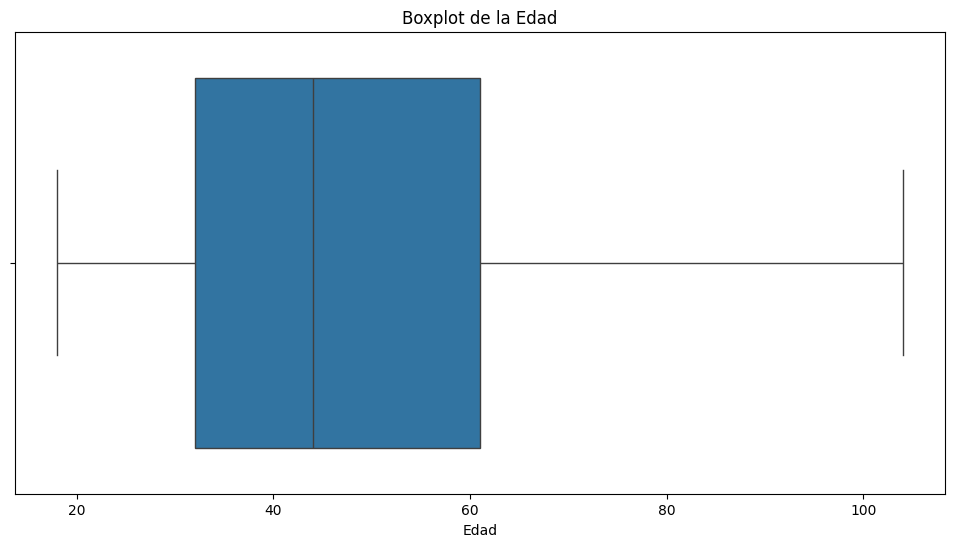

In [38]:
# Grafico la distribucion de edades de los encuestados
plt.figure(figsize=(12, 6))
sns.boxplot(x=bdfriesgo['edad'])
plt.title('Boxplot de la Edad')
plt.xlabel('Edad')
plt.show()


In [66]:
# Busco los mayores de 40 , que han fumado mas de 100 cigarrillos, por provincia 
mas40fumador = bdfriesgo[(bdfriesgo['edad'] >= 40) & (bdfriesgo['fumado_100_cigarrillos'] == 1)]
# agrupamos por provincia y sexo y contamos las id
mas40fumador_agrupado = mas40fumador.groupby(['cod_provincia', 'sexo']).size().reset_index(name='count')
#cambio los codigos de las tablas por los nombres de provincias
mas40fumador_agrupado['cod_provincia'] = mas40fumador_agrupado['cod_provincia'].map(cod_provincia)
# pivoteamos la tabla
pivot_tabla1 = mas40fumador_agrupado.pivot_table(index='cod_provincia', columns='sexo', values='count', fill_value=0)

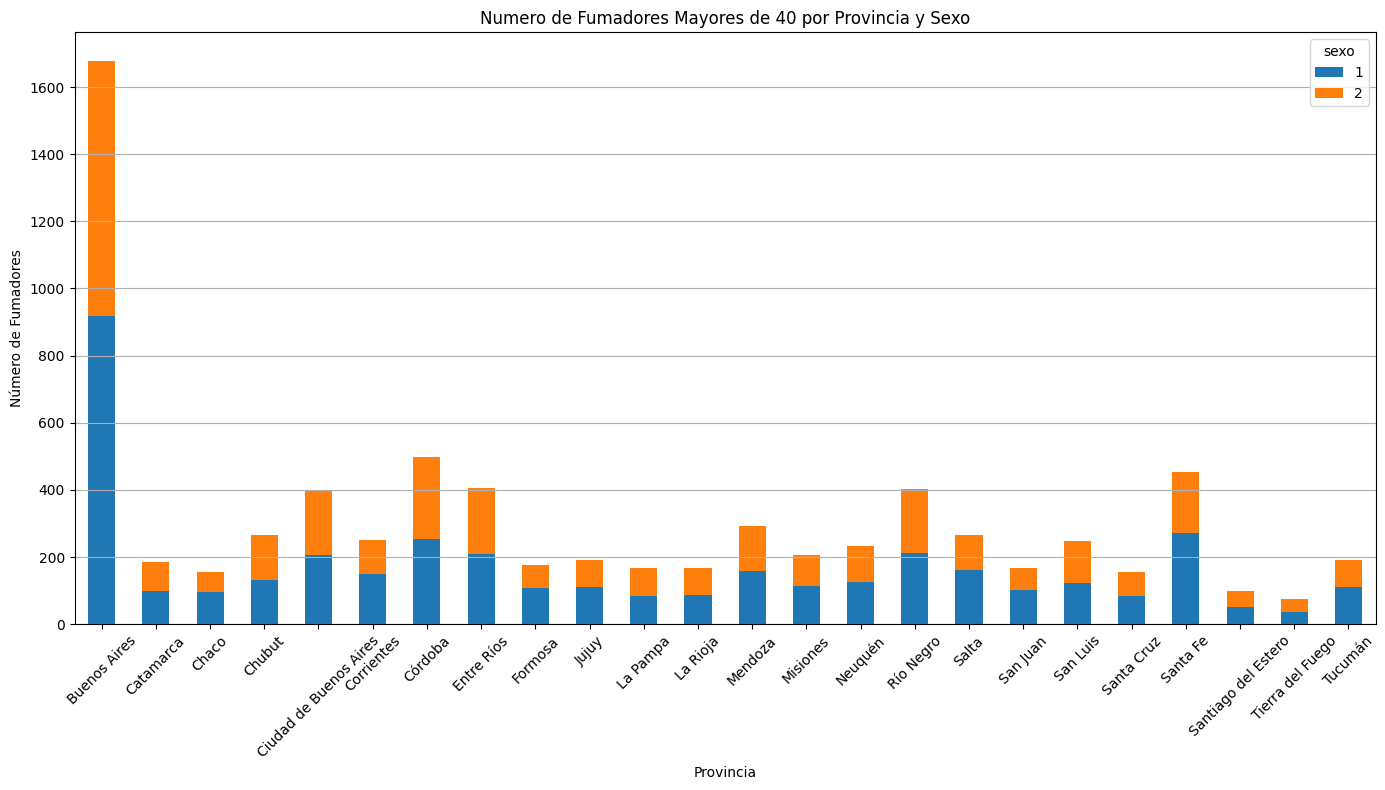

In [67]:
# Graficamos
pivot_tabla1.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Numero de Fumadores Mayores de 40 por Provincia y Sexo')
plt.xlabel('Provincia')
plt.ylabel('Número de Fumadores')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


En la tabla superior 'Numero de Fumadores Mayores de 40 por Provincia y Sexo', puede observarse que en la mayoria de las provincias los fumadores tienden a ser mayormente hombres. Para poder comparar en que provincia es mayor la proporcion de fumadores, debo tener en cuenta la cantidad de encuestados no fumadores.

In [64]:
# Ahora busco a los fumadores de entre 18 y 40 años
menos40fumador = bdfriesgo[(bdfriesgo['edad'] >= 18) & (bdfriesgo['edad'] < 40) & (bdfriesgo['fumado_100_cigarrillos'] == 1)]
# agrupamos por provincia y sexo y contamos las id
menos40fumador_agrupado = menos40fumador.groupby(['cod_provincia', 'sexo']).size().reset_index(name='count')
#cambio los codigos de las tablas por los nombres de provincias
menos40fumador_agrupado['cod_provincia'] = menos40fumador_agrupado['cod_provincia'].map(cod_provincia)
# pivoteamos la tabla
pivot_tabla2 = menos40fumador_agrupado.pivot_table(index='cod_provincia', columns='sexo', values='count', fill_value=0)

In [63]:
aux = mas40fumador_agrupado
aux['cod_provincia'] = aux['cod_provincia'].map(cod_provincia).fillna('Provincia Desconocida')


In [60]:
cod_provincia[2]

'Ciudad de Buenos Aires'

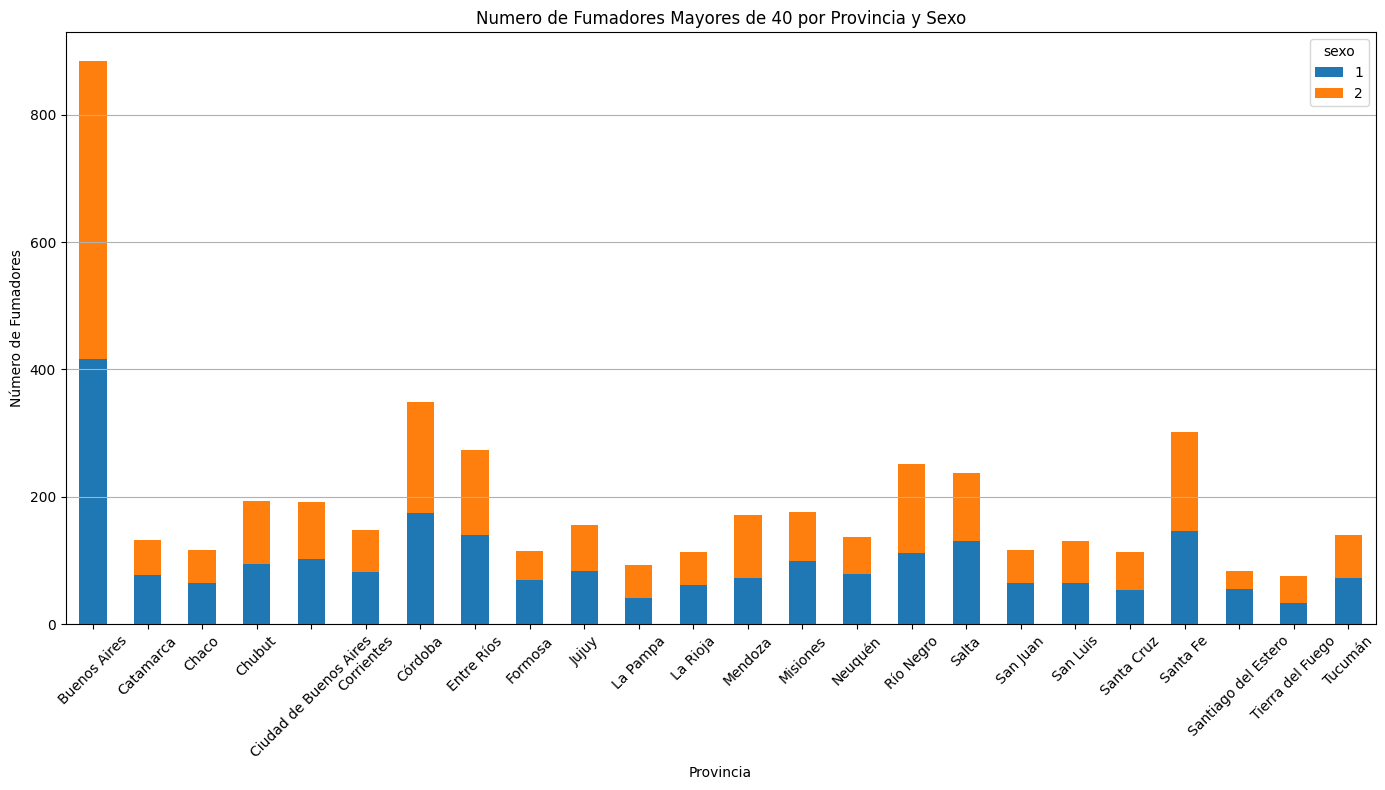

In [65]:
# graficamos
pivot_tabla2.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Numero de Fumadores Mayores de 40 por Provincia y Sexo')
plt.xlabel('Provincia')
plt.ylabel('Número de Fumadores')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
